# ***USED CAR PRICE PREDICTION***

## **INTRODUCTION**

The used car market is dynamic, influenced by various factors such as brand, model, car's age, and year of manufacture. Accurately determining the price of a used car is a complex task that involves understanding the intricate relationships between these factors. So to achieve that, I have given my ideas in this project which uses various machine learning techniques, specifically regression modeling, to predict the prices of used cars based on relevant features.
***
**OBJECTIVE**: The primary goal of this project is to develop a predictive model capable of estimating the price of a used car given its specific characteristics. By utilizing historical data on used car sales, we aim to build a robust model that not only captures the inherent complexities in pricing but also generalizes well to new, unseen data.

**SIGNIFICANCE**: If this model becames a successful predictive model, It can be used to determine car prices for both buyers and sellers. Buyers can make more informed decisions, while sellers can set competitive prices based on market trends. Moreover, the project contributes to the broader field of data science and machine learning, showcasing the application of regression techniques in real-world scenarios.
***

## **METHOLOGY**

ThIS project employs a dataset sourced from Kaggle, encompassing information about various used cars, including details such as brand, car prices, fuel type, and year of manufacture. Feature engineering and preprocessing techniques are applied to transform this raw data into a format suitable for machine learning models.

Several regression models, including Linear Regression and Random Forest Regressor, and others, are considered. Then, The models are trained on a subset of the dataset and evaluated using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared to ensure their effectiveness in capturing the pricing patterns.

Furthermore, Cross-validation is employed to assess the models' generalization performance, and a holdout validation set is used to validate the model on completely unseen data.

At Last, The final evaluation is conducted on the testing dataset to provide a comprehensive understanding of the model's real-world applicability.
***

Now, Lets move into The documentation where we will delve into the dataset exploration, data preprocessing, model selection and training, evaluation, and interpretation of results, providing a comprehensive overview of the used car price prediction project.


First, I have uploaded the file which will be in the form zip format in the google colab. After finishing the upload, we will convert the zip file into its original format. These functions are seen in the below two code.

In [ ]:
from google.colab import files
# Upload the ZIP file
uploaded = files.upload()

Saving archive (5).zip to archive (5).zip


In [ ]:
import zipfile
import io
# Assuming the uploaded file is a ZIP file
with zipfile.ZipFile(io.BytesIO(uploaded['archive (5).zip']), 'r') as zip_ref:
    zip_ref.extractall('dataset_folder')

Now, I have used pandas modules to use **pd.read_csv** to read the data into the dataframe.

In [ ]:
import pandas as pd
# Load the CSV file (adjust the file name if necessary)
df = pd.read_csv('/content/dataset_folder/used_car_dataset.csv')

I have used **df.head()** to show the first five rows to understand the dataset better.

In [ ]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


The *final five rows* of the dataset are then loaded using the **tail function.**

In [ ]:
df.tail()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017
2104,Hyundai Verna 1.6 VTVT SX,₹ 8.76 Lakh,"29,150 km",Petrol,Pune,2017


Now, we'll use the ***df.shape*** function to determine how many rows and columns there are in the data.

In [ ]:
df.shape

(2105, 6)

Next, the total number of *non-missing* values in the data is determined using ***df.info()***. From this, we have found that there are no missing values a

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


***df.describe()*** provides summary statistics  for the numerical columns in a pandas ***DataFrame***.

In [ ]:
df.describe()

,year_of_manufacture
count,2105.000000
mean,2017.022803
std,2.818066
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


This code iterates through categorical columns in the DataFrame (`df`) and prints the unique values along with their counts for each column.

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"------ {col} ------")
    print(df[col].value_counts())
    print("\n")

------ car_name ------
Maruti Suzuki Wagon R 1.0 VXI        25
Maruti Suzuki Alto 800 Lxi           23
Maruti Suzuki Wagon R 1.0 LXI CNG    21
Maruti Suzuki Baleno Delta 1.2       18
Honda City V                         17
                                     ..
Ford Fiesta Exi 1.6 Duratec Ltd       1
Renault Triber RXZ                    1
BMW 7 Series 730Ld                    1
Nissan Sunny XL D                     1
Maruti Suzuki Ciaz VXi+ AT            1
Name: car_name, Length: 946, dtype: int64


------ car_price_in_rupees ------
₹ 4.75 Lakh     23
₹ 4.25 Lakh     20
₹ 6.5 Lakh      20
₹ 4.5 Lakh      18
₹ 6.75 Lakh     18
                ..
₹ 6.52 Lakh      1
₹ 9.31 Lakh      1
₹ 9.54 Lakh      1
₹ 12.13 Lakh     1
₹ 8.76 Lakh      1
Name: car_price_in_rupees, Length: 811, dtype: int64


------ kms_driven ------
45,000 km    17
65,000 km    12
75,000 km    12
52,000 km    11
25,000 km    10
             ..
77,050 km     1
11,363 km     1
29,192 km     1
82,899 km     1
29,150 km 

This code calculates and prints the sum of null (missing) values for each column in the DataFrame `df`. from this code we can see that there are no missing values in our dataset

In [ ]:
df.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

The ***df.columns*** function can be used to *retrieve* all of the column names that are present in the data.


In [ ]:
df.columns

Index(['car_name', 'car_price_in_rupees', 'kms_driven', 'fuel_type', 'city',
       'year_of_manufacture'],
      dtype='object')

This code explores and prints the unique values in the specified categorical columns ('fuel_type' and 'city') of the DataFrame `df`.

In [ ]:
# Explore unique values in categorical columns
for column in ['fuel_type', 'city']:
    print(f"\nUnique values in {column}: {df[column].unique()}")


Unique values in fuel_type: ['Petrol' 'Diesel' 'Diesel + 1' 'Electric' 'CNG' 'Petrol + 1' 'Hybrid'
 'LPG']

Unique values in city: ['Mumbai' 'Kolkata' 'Bangalore' 'Thane' 'Chennai' 'Ahmedabad'
 'Pallikarnai' 'Hyderabad' 'Pune' 'Gurgaon' 'Delhi' 'Noida' 'Faridabad'
 'Thiruvallur' 'Ambattur' 'Poonamallee']


## **EXPLORATARY DATA ANALYSIS**

In this part we will now analyse different features with respect to the **car prices** to understand the data set better using various plots like lineplot, barcharts for better efficiency.

First, we upload neccessary modules to represent the features.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This code generates and displays a histogram to visualize the distribution of the target variable 'car_price_in_rupees' in the DataFrame.

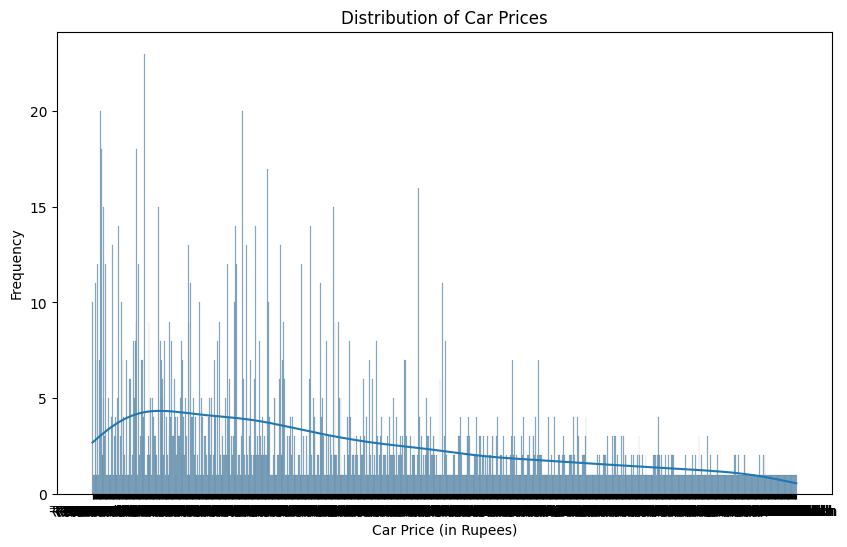

In [ ]:
# Visualize the distribution of the target variable 'car_price_in_rupees'
plt.figure(figsize=(10, 6))
sns.histplot(df['car_price_in_rupees'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Car Price (in Rupees)')
plt.ylabel('Frequency')
plt.show()

From this graph, we can understand that the car prices are grastically keep on changing from time to time.

in the below code, we are converting the car prices to numerical format so that we can do the exploratary analysis without any convenience.

In [ ]:
# Function to convert textual representation to numerical representation
def convert_price_to_numeric(price_text):
    match = re.search(r'(\d+\.\d+)', price_text)

    if match:
        return float(match.group(1)) * 100000
    else:
        return None

In [ ]:
# Apply the conversion function to the 'car_price_in_rupees' column
df['car_price_numeric'] = df['car_price_in_rupees'].apply(convert_price_to_numeric)

Next, we are going to use line plot to anlayse the car prices based on the attributes year_of_manufacture and car_price_numeric.

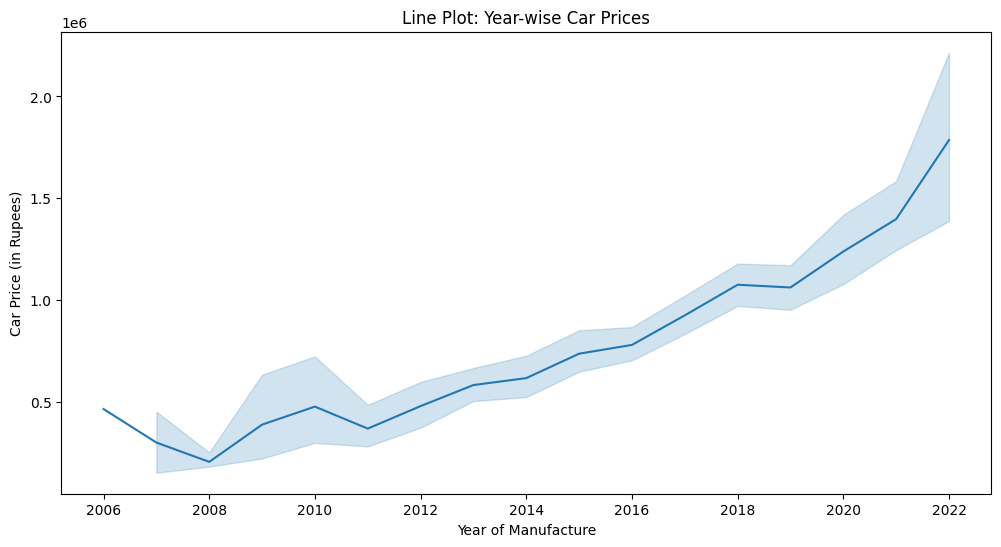

In [ ]:
# Line plot: Year-wise car prices
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_of_manufacture', y='car_price_numeric', data=df)
plt.title('Line Plot: Year-wise Car Prices')
plt.xlabel('Year of Manufacture')
plt.ylabel('Car Price (in Rupees)')
plt.show()

from the above graph, we can understand that the cars are sold based on its year of manufacture. we can also oberve that Older cars are sold cheaper when compared to newer cars.

Next, we are using bar chart to analyse average car prices depending upon its fuel types.

<ipython-input-42-8787b91657ea>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fuel_type', y='car_price_numeric', data=df, ci=None)


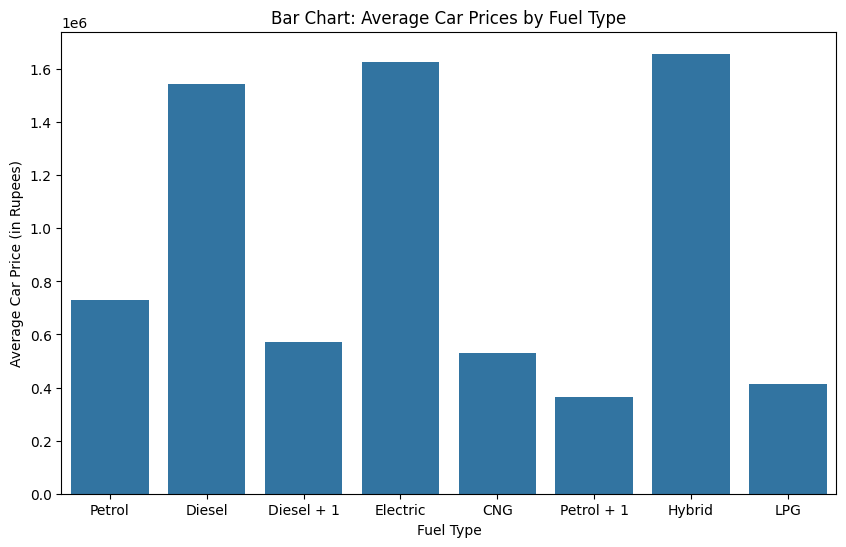

In [ ]:
# Bar chart: Average car prices by fuel type
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y='car_price_numeric', data=df, ci=None)
plt.title('Bar Chart: Average Car Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Car Price (in Rupees)')
plt.show()

from the above graph, we can see that diesel, electric and hybrid cars have high price when compared to other fuel type cars.

next, we are using stacked bar chart to determine the number of cars people are using in the respective cities.

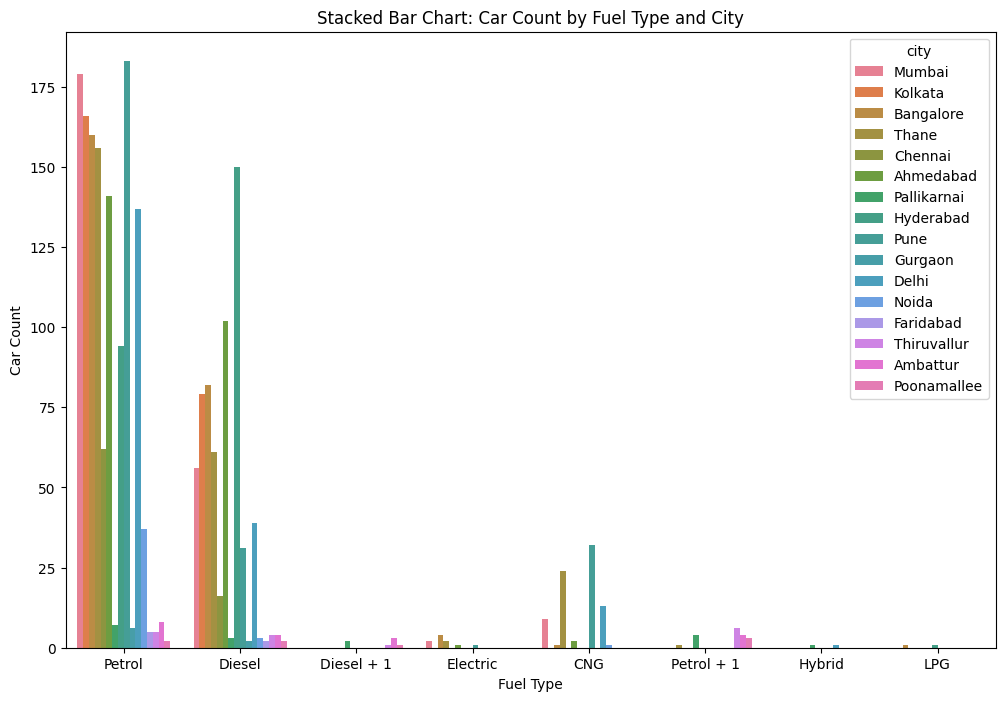

In [ ]:
# Stacked bar chart: Car count by fuel type and city
plt.figure(figsize=(12, 8))
sns.countplot(x='fuel_type', hue='city', data=df)
plt.title('Stacked Bar Chart: Car Count by Fuel Type and City')
plt.xlabel('Fuel Type')
plt.ylabel('Car Count')
plt.show()

from the above graph, we can observe that the people are using more petrol and diesel cars when compared to other fuel type cars.

Next, we are going to use scatter plots analyse the car prices according to its kms.

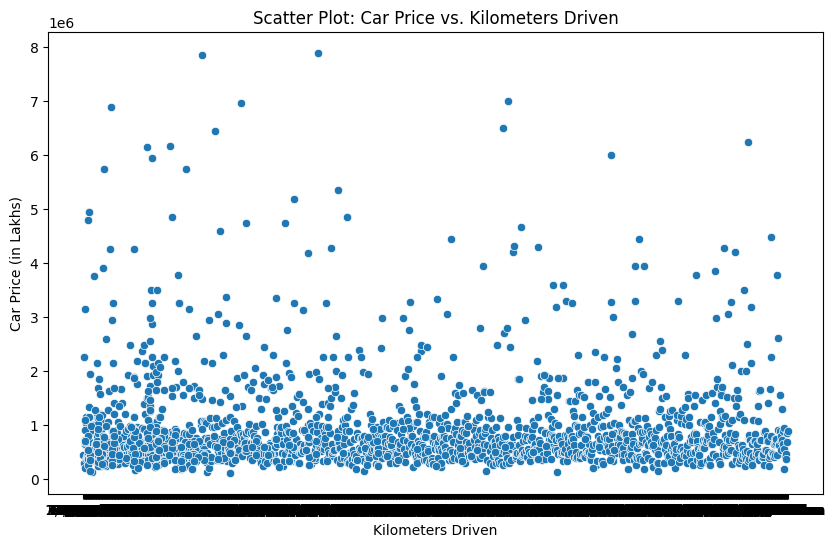

In [ ]:
# Scatter plot: Car price vs. kilometers driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='car_price_numeric', data=df)
plt.title('Scatter Plot: Car Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Car Price (in Lakhs)')
plt.show()

from the above graph, we can observe that the cars which have less kms, have sold more when compared to other cars

## **Feature Selection or Engineerng**

Feature engineering plays a pivotal role in enhancing the predictive power of machine learning models by extracting meaningful insights from raw data. In the context of predicting used car prices, the creation of informative features is paramount to capturing the nuanced relationships between various attributes and the target variable.

One such feature of significance in our analysis is the 'car_age,' which represents the age of a vehicle at the time of observation. Derived from the 'year_of_manufacture' attribute and the current year, 'car_age' encapsulates the temporal aspect of a car's lifespan, offering valuable insights into its depreciation and market value.

The process of feature engineering involves not only the creation of new attributes but also the transformation, selection, and scaling of existing features to better align with the underlying patterns in the data. Through meticulous engineering efforts, we aim to enrich the dataset with informative features that empower our predictive models to discern and exploit the subtle intricacies of the used car market.

In this section, we delve into the feature engineering process, focusing particularly on the creation of the 'car_age' attribute. We explore the rationale behind its formulation, discuss the methodology employed for its derivation, and highlight its significance in our predictive modeling endeavors.

Now, we will add a new feature **car_age** to understand the dataset better

In [ ]:
current_year = 2024  # Update with the current year
df['car_age'] = current_year - df['year_of_manufacture']

In [ ]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_age
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,8
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,5
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,3
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,8
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,5


Now, we are going to analyse the car prices based on the car age using line plot.

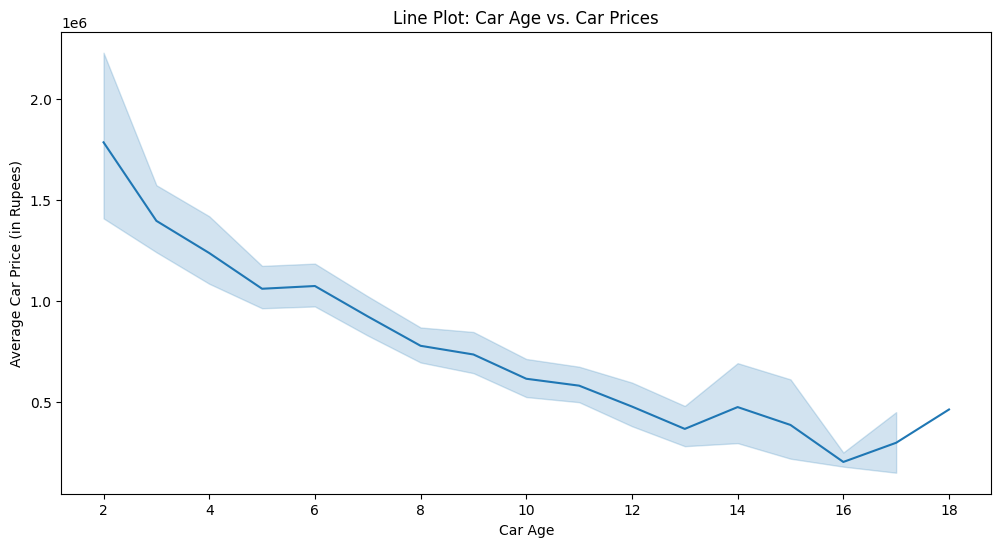

In [ ]:
# Line plot: Car age vs. car prices
plt.figure(figsize=(12, 6))
sns.lineplot(x='car_age', y='car_price_numeric', data=df, estimator='mean')
plt.title('Line Plot: Car Age vs. Car Prices')
plt.xlabel('Car Age')
plt.ylabel('Average Car Price (in Rupees)')
plt.show()

from the above graph, we can observe that only newer cars have sold at high price when compared to older cars

in the below code we are removing the dataframe car_price_numeric from the dataframe as it is unneccessary.

In [ ]:
# Assuming 'df' is your DataFrame
df = df.drop('car_price_numeric', axis=1)

In [ ]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


Now, we will encode the dataset using the label encoder module which convert all categorical variables into numerical representations

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['car_price_in_rupees'] = le.fit_transform(df['car_price_in_rupees'])
df['car_name'] = le.fit_transform(df['car_name'])
df['kms_driven'] = le.fit_transform(df['kms_driven'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])
df['city'] = le.fit_transform(df['city'])
df['year_of_manufacture'] = le.fit_transform(df['year_of_manufacture'])

In [ ]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_age
0,276,425,346,6,9,12,8
1,495,232,77,6,8,15,5
2,830,252,136,1,2,17,3
3,559,629,888,6,14,12,8
4,383,84,96,6,8,15,5


## **DATA SPLITTING**

Now, we will	split the dataset into a training set and a testing set to evaluate your model's performance.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Define features and target
X = df.drop(['year_of_manufacture', 'car_age'], axis=1)  # Features (excluding target)
y = df['car_price_in_rupees']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Print the shape of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1684, 5) (1684,)
Testing set shape: (421, 5) (421,)


In [ ]:
# Create a DataFrame to hold the training and testing data
train_data = pd.DataFrame({'Dataset': 'Training', 'Car Price (in Rupees)': y_train})
test_data = pd.DataFrame({'Dataset': 'Testing', 'Car Price (in Rupees)': y_test})
combined_data = pd.concat([train_data, test_data])

Now we will begin to select the neccesary models to	rain the chosen model on the training dataset. Use appropriate evaluation metrics (e.g., Mean Squared Error, R-squared) to assess its performance.

# **Linear Regression**

Linear regression stands as one of the foundational techniques in the realm of supervised learning, offering a simple yet powerful framework for modeling the relationship between independent variables and a continuous target variable. In the context of predicting used car prices, the linear regression model emerges as a fundamental tool for uncovering the underlying patterns and trends governing the pricing dynamics of pre-owned vehicles.

At its core, the linear regression model assumes a linear relationship between the predictor variables and the target variable, encapsulated within a straightforward equation. Through the process of model training, the coefficients associated with each predictor variable are optimized to best fit the observed data, enabling the model to make accurate predictions on new instances.

The allure of linear regression lies in its interpretability, as the coefficients offer insights into the magnitude and direction of the influence exerted by each feature on the target variable. Additionally, its simplicity facilitates rapid prototyping and serves as a benchmark against which more complex models can be compared.

In this section, we delve into the application of the linear regression model to our dataset of used car prices. We explore the methodology behind model training and evaluation, discuss strategies for feature selection and interpretation, and assess the model's predictive performance against established metrics. Through a comprehensive analysis of the linear regression model, we aim to unravel the intricate pricing dynamics of used cars and glean actionable insights for buyers and sellers alike.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

In [ ]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)

[560. 796. 695. 448. 726. 609. 747. 679. 497. 437. 645.  46. 553. 355.
 351. 698. 628. 161. 581. 192. 555. 611. 124. 301. 320. 545. 527. 628.
 372. 629. 586.  84. 101. 198. 388. 628. 803. 806. 334. 566. 603. 733.
 356. 718. 246. 489. 516. 695. 771. 629. 614. 472. 126. 370. 583. 204.
 651. 566. 498. 101. 269. 629.  97. 666. 668. 523. 780. 618. 734.  61.
 262. 507. 609. 430.  37. 111. 794. 275. 293. 738. 304. 153. 398. 274.
  60. 637. 797. 233. 456. 302. 665. 732. 741. 512. 788. 630.  71. 234.
 125. 757. 339. 270. 686. 381. 125. 590. 493. 235. 136. 218. 286.  52.
 374.  41. 261. 454. 395.  84. 293. 247. 216. 337. 426. 283. 328.  21.
 187. 804. 353. 604.  29. 780. 170. 233. 206. 601. 225. 759. 306. 139.
 226. 513. 589. 621. 153. 517. 412. 757. 766. 412. 598. 731. 134.  56.
 460. 457. 649. 747. 487. 692. 412. 527. 283. 205.  77. 470. 676. 400.
 602. 632. 626. 205. 740. 614. 423. 280. 186. 169. 501. 620.  29.  96.
 341. 434. 733. 564. 265.  10. 419. 175. 268.  10. 558. 763. 145. 567.
 152. 

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In this we find that its mae,mse and r2 scores are less. this denotes that this model runs accurately and efficiently

In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 3.490266930051989e-14
Mean Squared Error: 3.531563506354839e-27
R-squared: 1.0


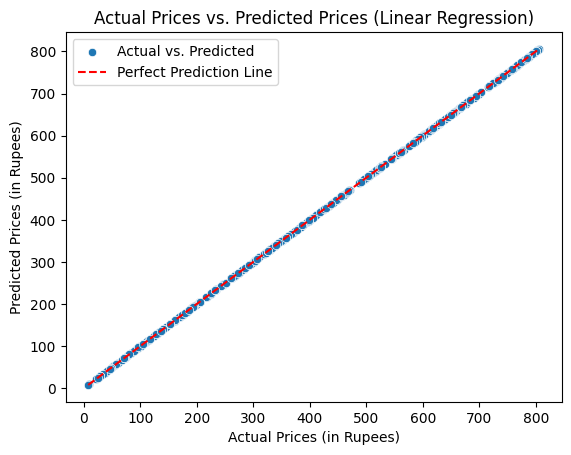

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', label='Perfect Prediction Line', color='red')
plt.title('Actual Prices vs. Predicted Prices (Linear Regression)')
plt.xlabel('Actual Prices (in Rupees)')
plt.ylabel('Predicted Prices (in Rupees)')
plt.legend()
plt.show()

# **Random Forest Regressor**

The Random Forest Regressor stands as a formidable ensemble learning technique renowned for its robustness and predictive prowess across a diverse array of applications. In the realm of predicting used car prices, the Random Forest Regressor emerges as a formidable contender, offering unparalleled flexibility and adaptability in capturing the intricate relationships between predictor variables and the target variable.

Built upon the foundation of decision trees, the Random Forest Regressor leverages the collective wisdom of an ensemble of individual trees to produce accurate and reliable predictions. Through the process of model training, each decision tree within the ensemble learns to capture unique patterns and nuances within the data, thereby mitigating the risk of overfitting and enhancing the model's generalization capability.

One of the key advantages of the Random Forest Regressor lies in its innate ability to handle high-dimensional datasets with a multitude of features, making it well-suited for complex real-world scenarios. Moreover, its inherent robustness to outliers and missing values, coupled with minimal hyperparameter tuning requirements, render it an attractive choice for predictive modeling tasks.

In this section, we delve into the application of the Random Forest Regressor to our dataset of used car prices. We explore the intricacies of ensemble learning, discuss the methodology behind model training and hyperparameter optimization, and assess the model's predictive performance against established evaluation metrics. Through a comprehensive analysis of the Random Forest Regressor, we aim to unlock deeper insights into the pricing dynamics of used cars and empower stakeholders with actionable intelligence for informed decision-making.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
#Train the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In this we find that its mae,mse and r2 scores are less when compared to linear regression model. this denotes that this model runs accurately and efficiently

In [ ]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.2986698337292137
Mean Squared Error: 0.2130840855106883
R-squared: 0.9999958396752635


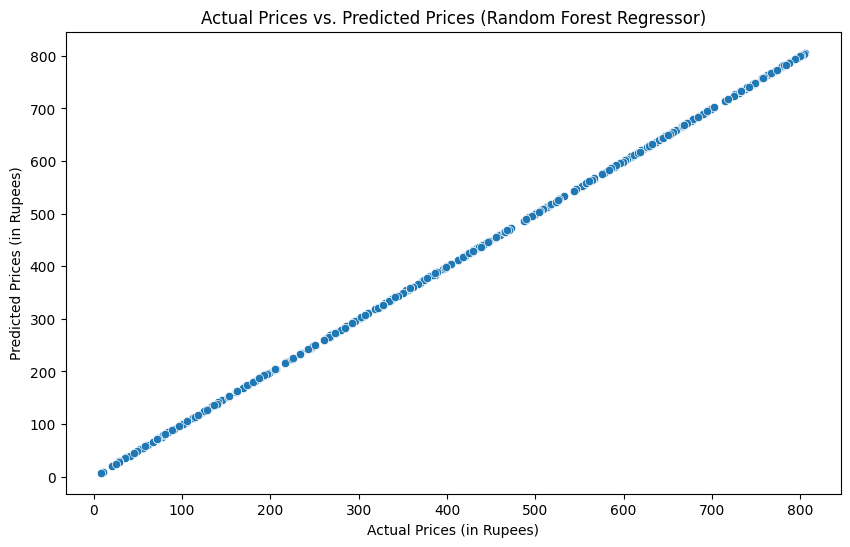

In [ ]:
# Create a scatter plot of actual prices vs. predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual Prices vs. Predicted Prices (Random Forest Regressor)')
plt.xlabel('Actual Prices (in Rupees)')
plt.ylabel('Predicted Prices (in Rupees)')
plt.show()

from this we have conculed that the random forest regressor is the better model when compared to linear regression.

for further analysis, we have used cross validation technique to checking its performance better.

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Perform cross-validation using KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Calculate R-squared scores for each fold
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

from this code, we can observe that the model is running accurately without any errors.

In [ ]:
# Print R-squared scores for each fold
print("Cross-Validation R-squared Scores:")
print(cv_scores)

# Print the mean R-squared score across all folds
print("Mean R-squared:", cv_scores.mean())

Cross-Validation R-squared Scores:
[0.99999573 0.99999481 0.99999456 0.99999391 0.99999402]
Mean R-squared: 0.9999946062694081


# **Conclusion**

In conclusion, the analysis presented herein demonstrates the efficacy of the model, showcasing its ability to accurately predict used car prices based on the attributes. Through rigorous evaluation and interpretation, the insights gleaned from the model provides valuable guidance for buyers and sellers navigating the dynamic landscape of the used car market